In [18]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

In [19]:
#Save path to data set in a variable
data_file = "city_data.csv"
data_file2 = "ride_data.csv"

In [21]:
#Use pandas to read the data
#print(data_file)
#data_file_pd = pd.read_json(data_file)
# pd_file = pd.read_csv(data_file)
# pd_file.head()

pd_file = pd.read_csv(data_file)
pd_file.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [22]:
pd_file2 = pd.read_csv(data_file2)
pd_file2.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [146]:
#Merge the files together on city, which is the common field between the two.
# Merge our two data frames together
combined_pyber_data = pd.merge(pd_file, pd_file2 , on="city")
combined_pyber_data.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [62]:
pwd

'C:\\Users\\mukag\\Desktop\\rcb\\MatplotlibHW'

In [138]:
#Create a dataframe taht groups by city.
citygroup = pd.DataFrame(combined_pyber_data.groupby(["city"]).count())
citygroup.head()


,driver_count,type,date,fare,ride_id
city,,,,,
Alvarezhaven,31,31,31,31,31
Alyssaberg,26,26,26,26,26
Anitamouth,9,9,9,9,9
Antoniomouth,22,22,22,22,22
Aprilchester,19,19,19,19,19


In [144]:
avgfare = round(combined_pyber_data.groupby(["city"]).mean()["fare"],2)
avgfare.head()

city
Alvarezhaven    23.93
Alyssaberg      20.61
Anitamouth      37.32
Antoniomouth    23.62
Aprilchester    21.98
Name: fare, dtype: float64

In [142]:
totalrides = combined_pyber_data.groupby(["city"]).count()["ride_id"]
totalrides.head()

city
Alvarezhaven    31
Alyssaberg      26
Anitamouth       9
Antoniomouth    22
Aprilchester    19
Name: ride_id, dtype: int64

In [152]:
# totaldrivers = combined_pyber_data.groupby("city").mean()["driver_count"]
# totalrides.head()

bycity = combined_pyber_data.groupby('city')
driver_count = bycity.mean()['driver_count']
driver_count.head()

city
Alvarezhaven    21.0
Alyssaberg      67.0
Anitamouth      16.0
Antoniomouth    21.0
Aprilchester    49.0
Name: driver_count, dtype: float64

In [155]:
cityanalysis = pd.DataFrame({"Average Fare":avgfare,
                        "Rides Per City":totalrides,
                         "Drivers per City":driver_count})
#"City Type": "type"} )
cityanalysis.head()

,Average Fare,Drivers per City,Rides Per City
city,,,
Alvarezhaven,23.93,21.0,31
Alyssaberg,20.61,67.0,26
Anitamouth,37.32,16.0,9
Antoniomouth,23.62,21.0,22
Aprilchester,21.98,49.0,19


In [173]:
#Create a new dataframe as a copy of pd_file (citydata csv) and set the index to city for merging purposes.
pd_file.reset_index()
pd_file.head()
citycsv = pd.DataFrame(pd_file)
citycsv = citycsv.reset_index()
citycsv = citycsv.set_index('city')
citycsv.head()

,index,driver_count,type
city,,,
Kelseyland,0,63,Urban
Nguyenbury,1,8,Urban
East Douglas,2,12,Urban
West Dawnfurt,3,34,Urban
Rodriguezburgh,4,52,Urban


In [181]:
cityanalysis2 = pd.DataFrame(cityanalysis)
cityanalysis2 = cityanalysis2.reset_index()
cityanalysis2 = cityanalysis2.set_index('city')
cityanalysis2.head()

,Average Fare,Drivers per City,Rides Per City
city,,,
Alvarezhaven,23.93,21.0,31
Alyssaberg,20.61,67.0,26
Anitamouth,37.32,16.0,9
Antoniomouth,23.62,21.0,22
Aprilchester,21.98,49.0,19


In [187]:
#Merge the dataframe above with the citydata csv to get the type.
getcity = pd.merge(citycsv, cityanalysis2, left_index=True,right_index=True) 
#on="city",left_index=True,right_index=True)
#drop driver count and index as they are irrelvant.
del getcity["index"]
del getcity["driver_count"]
getcity.head()

,type,Average Fare,Drivers per City,Rides Per City
city,,,,
Alvarezhaven,Urban,23.93,21.0,31
Alyssaberg,Urban,20.61,67.0,26
Anitamouth,Suburban,37.32,16.0,9
Antoniomouth,Urban,23.62,21.0,22
Aprilchester,Urban,21.98,49.0,19


Text(0.5,0,'Average Fares ($)')

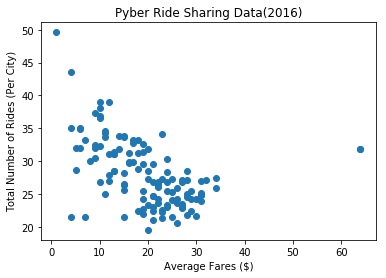

In [197]:

#ridelist = cityanalysis['Rides Per City'].tolist()
#avgfairlist = cityanalysis['Average Fare'].tolist()

ridelist = getcity['Rides Per City'].tolist()
avgfairlist = getcity['Average Fare'].tolist()
typelist = getcity['type'].tolist()
#s = getcity["type"]
plt.scatter(x=ridelist, y=avgfairlist)
#plt.scatter(x=ridelist, y=avgfairlist, s=typelist, c="red", alpha=0.4)
plt.title('Pyber Ride Sharing Data(2016)')
plt.ylabel('Total Number of Rides (Per City)')
plt.xlabel('Average Fares ($)')

In [71]:
#% of Total Fares 
# demogroup = combined_pyber_data.groupby(["city","type"])
# demogroup.size()
typegroup = combined_pyber_data.groupby(["type","city"])
typegroup.head()


,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829
28,Nguyenbury,8,Urban,2016-07-09 04:42:44,6.28,1543057793673
29,Nguyenbury,8,Urban,2016-11-08 19:22:04,19.49,1702803950740
30,Nguyenbury,8,Urban,2016-03-19 13:08:09,35.07,9198401002936
31,Nguyenbury,8,Urban,2016-05-12 15:57:15,41.63,224683791660
32,Nguyenbury,8,Urban,2016-04-07 06:59:51,19.01,4648481871830


In [87]:
ridespertype = combined_pyber_data.groupby(["city","type"]).size()
ridespertype
#create into a dataframe
farespertype = pd.DataFrame(ridespertype)
farespertype
typefares = pd.DataFrame(farespertype.groupby(["type"]).count())
typefares.columns = ["NumberFares"]
typefares


,NumberFares
type,
Rural,18
Suburban,41
Urban,66


In [92]:
#Total Number of Fares
fares_count = typefares["NumberFares"].sum()
fares_count

125

In [89]:
ruralrides = typefares["NumberFares"].loc["Rural"]
print(ruralrides)

18


In [96]:
subrides = typefares["NumberFares"].loc["Suburban"]
print(subrides)

41


In [97]:
urbanrides = typefares["NumberFares"].loc["Urban"]
print(urbanrides)

66


In [95]:
ruralpercent = round(ruralrides / fares_count, 2) * 100
ruralpercent

14.000000000000002

In [98]:
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [ruralrides, subrides, urbanrides]

# The colors of each section of the pie chart
colors = ["yellowgreen", "red", "lightcoral"]
#, "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

([<matplotlib.patches.Wedge at 0x1871d9d6390>,
 [Text(-1.16395,0.291932,'Rural'),
  Text(-0.360303,-1.03932,'Suburban'),
  Text(0.77836,0.777274,'Urban')],
 [Text(-0.67897,0.170294,'14.4%'),
  Text(-0.196529,-0.566901,'32.8%'),
  Text(0.42456,0.423968,'52.8%')])

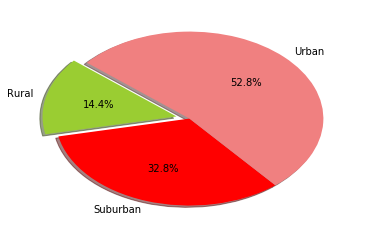

In [99]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

In [199]:
# Tells matplotlib that we want a pie chart with equal axes
#plt.axis("equal")

In [104]:
# Prints our pie chart to the screen
plt.show()

In [198]:
#Total Rides by City Type
ridestype = pd.DataFrame(combined_pyber_data.groupby(["city","type"]).sum())

ridestype = combined_pyber_data.groupby(["type"]).count()["ride_id"]
ridestype.head()

type
Rural        125
Suburban     657
Urban       1625
Name: ride_id, dtype: int64

In [112]:
group = ridestype["ride_id"].count()
group

city                  type    
Alvarezhaven          Urban       31
Alyssaberg            Urban       26
Anitamouth            Suburban     9
Antoniomouth          Urban       22
Aprilchester          Urban       19
Arnoldview            Urban       31
Campbellport          Suburban    15
Carrollbury           Suburban    10
Carrollfort           Urban       29
Clarkstad             Suburban    12
Conwaymouth           Suburban    11
Davidtown             Urban       21
Davistown             Urban       25
East Cherylfurt       Suburban    13
East Douglas          Urban       22
East Erin             Urban       28
East Jenniferchester  Suburban    19
East Leslie           Rural       11
East Stephen          Rural       10
East Troybury         Rural        7
Edwardsbury           Urban       27
Erikport              Rural        8
Eriktown              Urban       19
Floresberg            Suburban    10
Fosterside            Urban       24
Hernandezshire        Rural        9
Hornela

In [54]:
countfare = demogroup.count()["fare"]
countfare

city                  type    
Alvarezhaven          Urban       31
Alyssaberg            Urban       26
Anitamouth            Suburban     9
Antoniomouth          Urban       22
Aprilchester          Urban       19
Arnoldview            Urban       31
Campbellport          Suburban    15
Carrollbury           Suburban    10
Carrollfort           Urban       29
Clarkstad             Suburban    12
Conwaymouth           Suburban    11
Davidtown             Urban       21
Davistown             Urban       25
East Cherylfurt       Suburban    13
East Douglas          Urban       22
East Erin             Urban       28
East Jenniferchester  Suburban    19
East Leslie           Rural       11
East Stephen          Rural       10
East Troybury         Rural        7
Edwardsbury           Urban       27
Erikport              Rural        8
Eriktown              Urban       19
Floresberg            Suburban    10
Fosterside            Urban       24
Hernandezshire        Rural        9
Hornela

In [55]:
#type(pd_file.groupby(["city","type"]))

In [49]:
#list(pd_file.groupby(["type"]))

In [50]:
# for group_key, group_value in pd_file.groupby('type'):
#     print(group_key)
#     print(group_value)

In [72]:
for group_key, group_value in typegroup:
    print(group_key)
    print(group_value)

('Rural', 'East Leslie')
             city  driver_count   type                 date   fare  \
2376  East Leslie             9  Rural  2016-04-21 18:44:59  19.26   
2377  East Leslie             9  Rural  2016-04-13 04:30:56  40.47   
2378  East Leslie             9  Rural  2016-04-26 02:34:30  45.80   
2379  East Leslie             9  Rural  2016-04-05 18:53:16  44.78   
2380  East Leslie             9  Rural  2016-11-13 10:21:10  15.71   
2381  East Leslie             9  Rural  2016-03-06 06:10:40  51.32   
2382  East Leslie             9  Rural  2016-03-04 10:18:03  13.43   
2383  East Leslie             9  Rural  2016-11-28 09:09:15  37.76   
2384  East Leslie             9  Rural  2016-09-08 19:19:38  30.59   
2385  East Leslie             9  Rural  2016-03-02 22:09:34  36.61   
2386  East Leslie             9  Rural  2016-06-22 07:45:30  34.54   

            ride_id  
2376  5836114186294  
2377  7075058703398  
2378  9402873395510  
2379  6113138249150  
2380  7275986542384  
23

('Suburban', 'Jasonfort')
           city  driver_count      type                 date   fare  \
2002  Jasonfort            25  Suburban  2016-11-06 09:45:39  29.92   
2003  Jasonfort            25  Suburban  2016-04-13 11:32:30  38.57   
2004  Jasonfort            25  Suburban  2016-10-15 03:31:31  21.43   
2005  Jasonfort            25  Suburban  2016-09-19 16:12:44  47.02   
2006  Jasonfort            25  Suburban  2016-05-10 11:11:41  26.60   
2007  Jasonfort            25  Suburban  2016-10-04 12:19:53  12.46   
2008  Jasonfort            25  Suburban  2016-09-14 00:49:40  22.68   
2009  Jasonfort            25  Suburban  2016-07-20 22:23:32  34.42   
2010  Jasonfort            25  Suburban  2016-12-04 15:42:42  19.35   
2011  Jasonfort            25  Suburban  2016-06-26 16:45:40  35.04   
2012  Jasonfort            25  Suburban  2016-11-13 12:08:17  23.24   
2013  Jasonfort            25  Suburban  2016-11-10 20:28:12  23.25   

            ride_id  
2002  7780702340033  
2003  

1048  Eriktown            15  Urban  2016-09-06 07:01:34  41.11  8990582387342
('Urban', 'Fosterside')
           city  driver_count   type                 date   fare  \
758  Fosterside            69  Urban  2016-08-12 11:52:41  28.08   
759  Fosterside            69  Urban  2016-04-01 04:46:39  13.17   
760  Fosterside            69  Urban  2016-01-19 01:06:19  10.11   
761  Fosterside            69  Urban  2016-11-07 00:00:09  17.92   
762  Fosterside            69  Urban  2016-05-11 13:59:15   7.65   
763  Fosterside            69  Urban  2016-06-01 06:32:00   6.54   
764  Fosterside            69  Urban  2016-04-26 03:40:24  29.14   
765  Fosterside            69  Urban  2016-04-20 15:20:20  39.01   
766  Fosterside            69  Urban  2016-07-16 02:09:00  36.38   
767  Fosterside            69  Urban  2016-04-02 00:12:26  25.85   
768  Fosterside            69  Urban  2016-11-07 18:52:38  17.47   
769  Fosterside            69  Urban  2016-04-17 05:32:46  22.15   
770  Fostersi

267  Mooreview            34  Urban  2016-07-11 18:46:36  19.51  2835637288297
('Urban', 'New Aaron')
          city  driver_count   type                 date   fare        ride_id
702  New Aaron            60  Urban  2016-08-12 17:14:50  34.63  6249037081192
703  New Aaron            60  Urban  2016-10-30 22:19:10   8.44  1130740557911
704  New Aaron            60  Urban  2016-10-04 21:47:13  42.87  3212713367333
705  New Aaron            60  Urban  2016-10-18 23:07:01  27.41  4273352984502
706  New Aaron            60  Urban  2016-08-12 22:11:17  12.53  7862268645958
707  New Aaron            60  Urban  2016-10-11 02:49:17  13.03  6751552391576
708  New Aaron            60  Urban  2016-01-02 17:29:31  16.77  8109149518178
709  New Aaron            60  Urban  2016-03-23 01:00:16  33.34  4210683674924
710  New Aaron            60  Urban  2016-07-01 02:22:52   4.90  4049248134531
711  New Aaron            60  Urban  2016-03-08 03:33:45  21.76   860822115609
712  New Aaron            60 